<a href="https://colab.research.google.com/github/dellacortelab/python_tutorials/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: I want to embed a youtube video

from IPython.display import HTML

HTML("""
<iframe width="560" height="315" src="https://www.youtube.com/embed/d1NK83vve6c" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
""")


In [8]:
!pip install pygame


In [1]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
import pygame
from google.colab.patches import cv2_imshow
from google.colab import output

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:
pip install SimpleGUICS2Pygame

In [2]:
try:
    import simplegui
except ImportError:
    import SimpleGUICS2Pygame.simpleguics2pygame as simplegui

# CodeSkulptor runs Python programs in your browser.
# Click the upper left button to run this simple demo.

# CodeSkulptor is tested to run in recent versions of
# Chrome, Firefox, Safari, and Edge.


message = "Welcome!"

# Handler for mouse click
def click():
    global message
    message = "Good job!"

# Handler to draw on canvas
def draw(canvas):
    canvas.draw_text(message, [50,112], 48, "Red")

# Create a frame and assign callbacks to event handlers
frame = simplegui.create_frame("Home", 300, 200)
frame.add_button("Click me", click)
frame.set_draw_handler(draw)

# Start the frame animation
frame.start()


KeyboardInterrupt: 

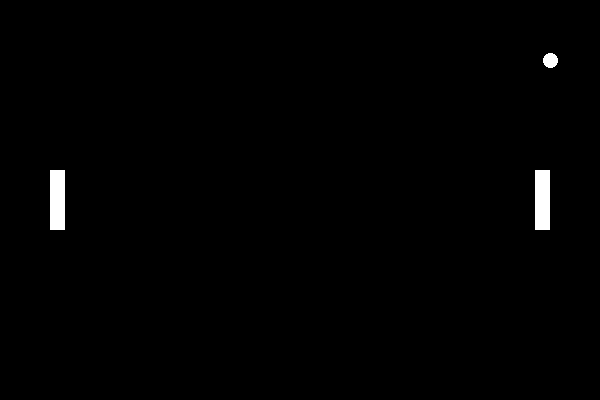

KeyboardInterrupt: 

In [12]:
import pygame
import sys

# Initialize Pygame
pygame.init()

# Set up the game window
width, height = 600, 400
win = pygame.display.set_mode((width, height))
pygame.display.set_caption("Pong Game")

# Set up colors
black = (0, 0, 0)
white = (255, 255, 255)

# Set up paddles
paddle_width, paddle_height = 15, 60
paddle_speed = 5
left_paddle = pygame.Rect(50, height // 2 - paddle_height // 2, paddle_width, paddle_height)
right_paddle = pygame.Rect(width - 50 - paddle_width, height // 2 - paddle_height // 2, paddle_width, paddle_height)

# Set up ball
ball_size = 15
ball_speed = 5
ball = pygame.Rect(width // 2 - ball_size // 2, height // 2 - ball_size // 2, ball_size, ball_size)
ball_direction = [1, 1]  # [x, y]

# Set up clock
clock = pygame.time.Clock()

# Game loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    keys = pygame.key.get_pressed()
    if keys[pygame.K_w] and left_paddle.top > 0:
        left_paddle.y -= paddle_speed
    if keys[pygame.K_s] and left_paddle.bottom < height:
        left_paddle.y += paddle_speed

    if keys[pygame.K_UP] and right_paddle.top > 0:
        right_paddle.y -= paddle_speed
    if keys[pygame.K_DOWN] and right_paddle.bottom < height:
        right_paddle.y += paddle_speed

    # Move the ball
    ball.x += ball_speed * ball_direction[0]
    ball.y += ball_speed * ball_direction[1]

    # Ball collisions with walls
    if ball.top <= 0 or ball.bottom >= height:
        ball_direction[1] *= -1
    if ball.left <= 0 or ball.right >= width:
        ball_direction[0] *= -1

    # Ball collisions with paddles
    if ball.colliderect(left_paddle) or ball.colliderect(right_paddle):
        ball_direction[0] *= -1

    # Draw everything
    win.fill(black)
    pygame.draw.rect(win, white, left_paddle)
    pygame.draw.rect(win, white, right_paddle)
    pygame.draw.ellipse(win, white, ball)

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(20)
    output.clear(wait=True)

    image = pygame.surfarray.array3d(win)
    image = image.transpose([1, 0, 2])
    cv2_imshow(image)
